https://www.investopedia.com/terms/f/fisher-transform.asp

## Fisher Transform Indicator

In [1]:
import pandas as pd
from numpy import log
import numpy as np
np.seterr(divide='ignore')
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
import warnings
warnings.filterwarnings('ignore')

def plotdists(data, y1, y2):
    fig, ax =plt.subplots(1,2)
    sns.histplot(data,x = y1, kde=True, ax=ax[0])
    sns.histplot(data,x = y2, kde=True, ax=ax[1])
    
def minmaxplus(col, x):
    mini = min(col)
    maxi = max(col)
    return ( 2*x - mini - maxi ) / ( maxi - mini )

def getfisher(x):
    return 0.5 * log( (1 + x) / (1 - x) )

def plotlines(y1, y2):
    sns.lineplot(data=y1, color = "#4285F4", linewidth = 2)
    ax2 = plt.twinx()
    sns.lineplot(data=y2, color="#F4B400", ax=ax2, linewidth = 2, legend = True)
    
def addfisher(df):
    data = df.copy()
    col = data.close
    data["minmaxplus"] = np.nan
    data["fisher"] = np.nan
    period = 9
    for i in range(period, len(data)):
        mmp = minmaxplus(col[i-period:i], col[i-1])
        data.iloc[i,2] = mmp
        fisher = getfisher(mmp)
        data.iloc[i,3] = fisher
    data.fisher = np.nan_to_num(data.fisher, copy=True, posinf=np.nan, neginf=np.nan)
    return data

def fisheranalysis(filename):
    data = pd.read_csv("cryptodatadownload/" + filename, nrows = 500, skiprows = 1, usecols = [0,6])[::-1].reset_index(drop = True)
    data = addfisher(data)
    plotdists(data, "close", "fisher")
    plt.figure()
    plotlines(data.close, data.fisher)

# BTC

## D

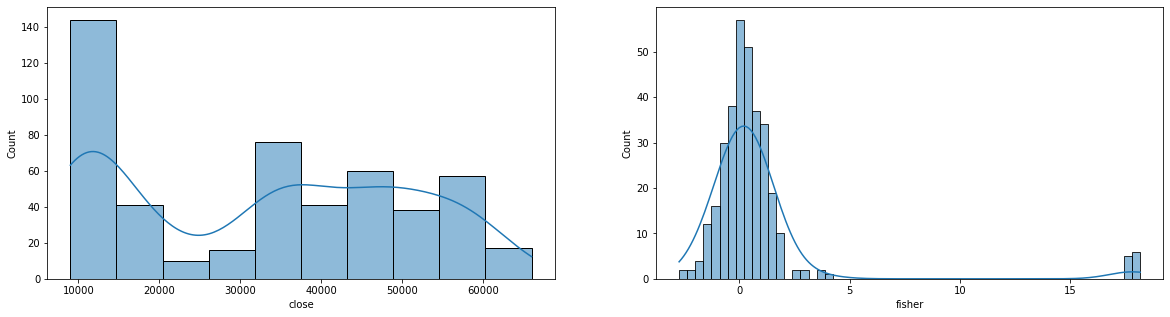

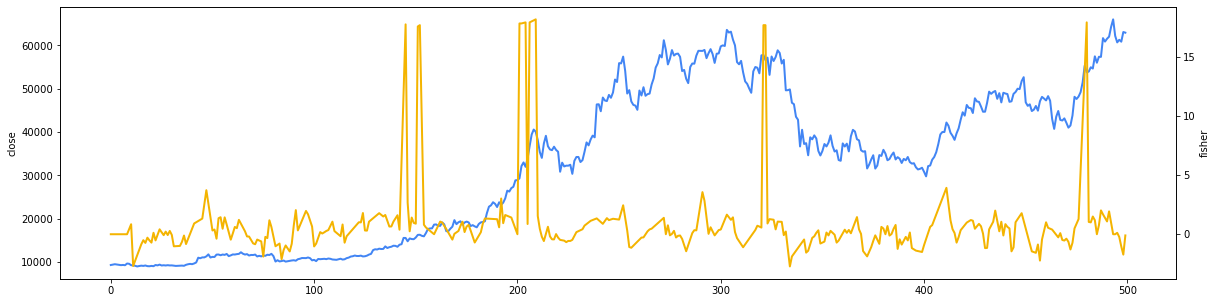

In [2]:
fisheranalysis("Binance_BTCUSDT_d.csv")

# ETH

## D

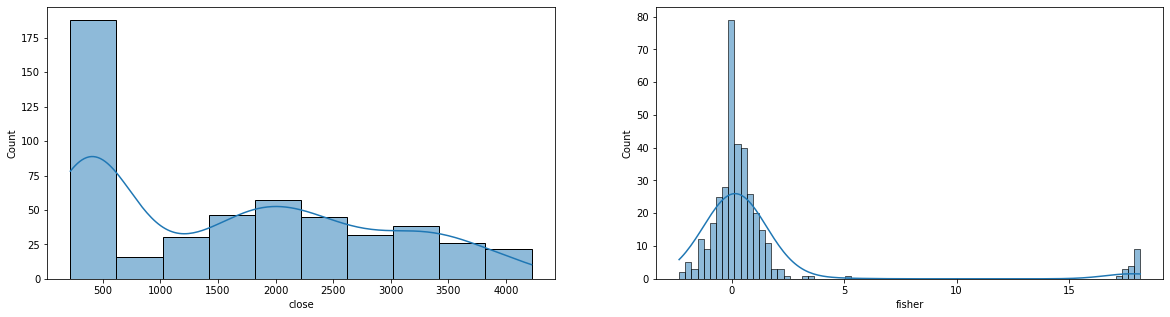

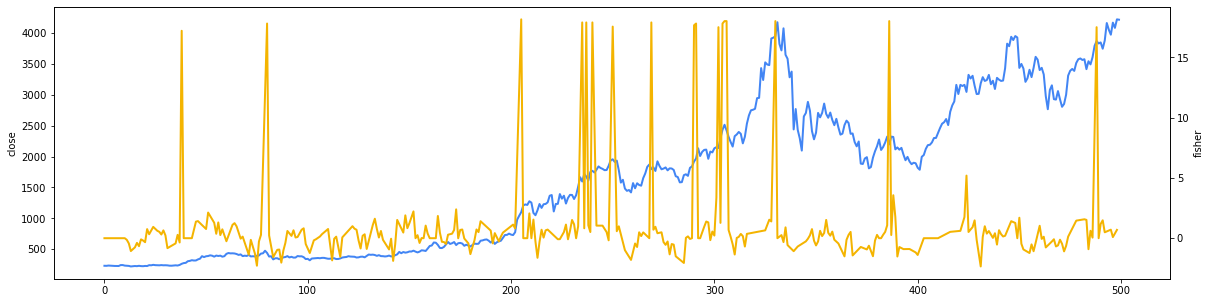

In [3]:
fisheranalysis("Binance_ETHUSDT_d.csv")

# SOL

## 1H

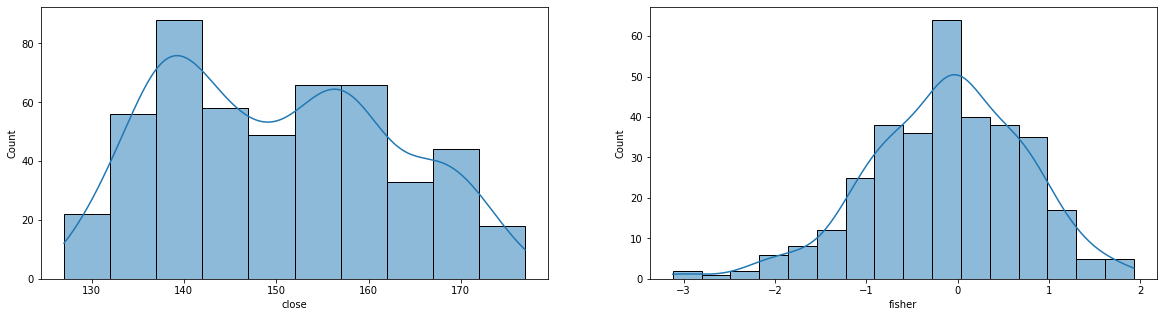

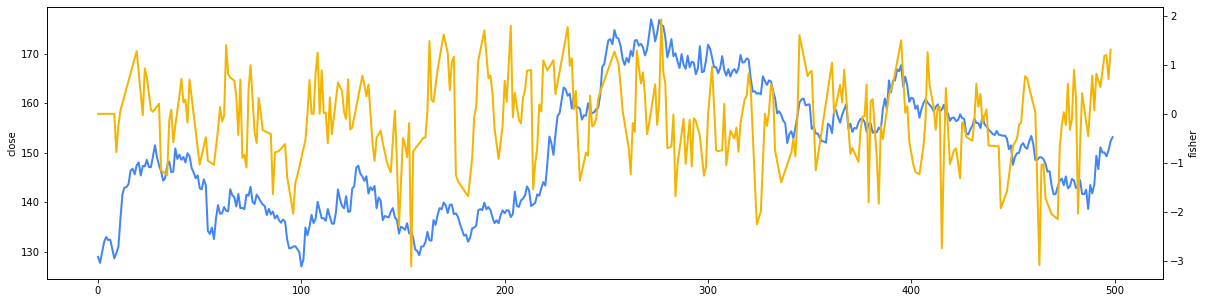

In [4]:
fisheranalysis("Binance_SOLUSDT_1h.csv")

## 1m

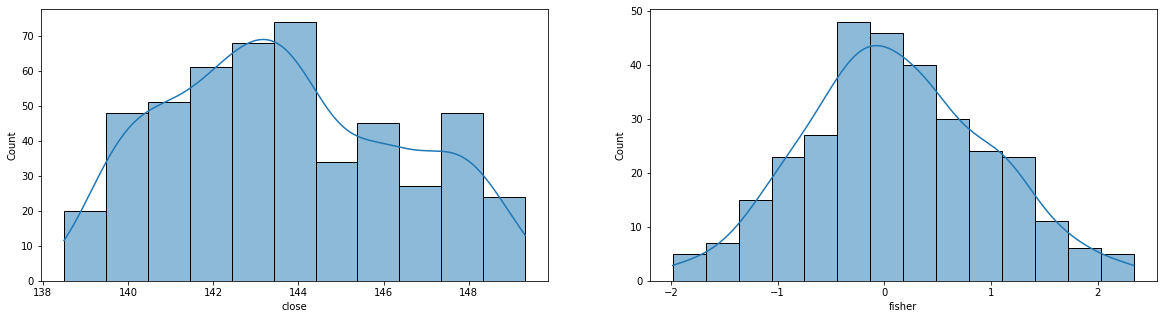

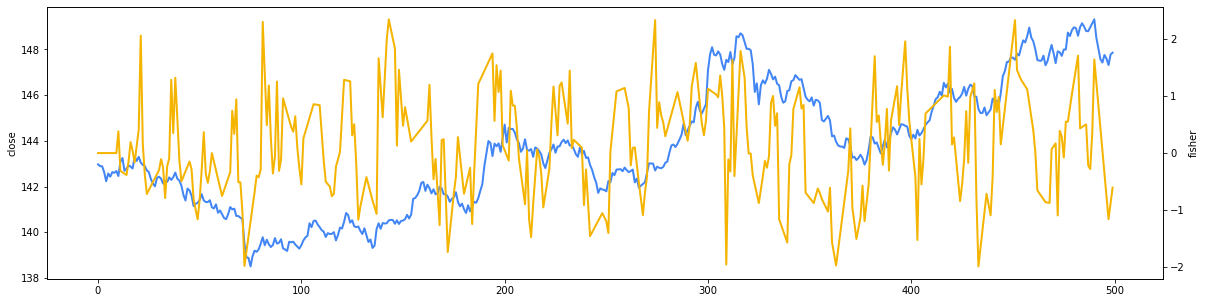

In [5]:
fisheranalysis("Binance_SOLUSDT_minute.csv")

# XRP

## 1h

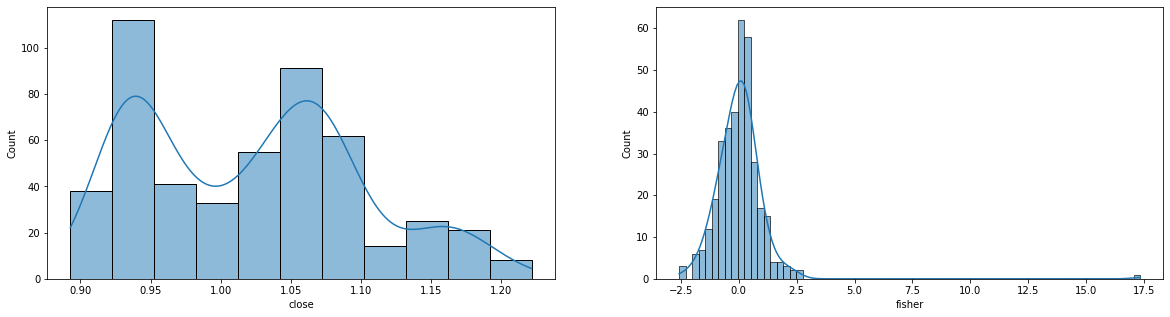

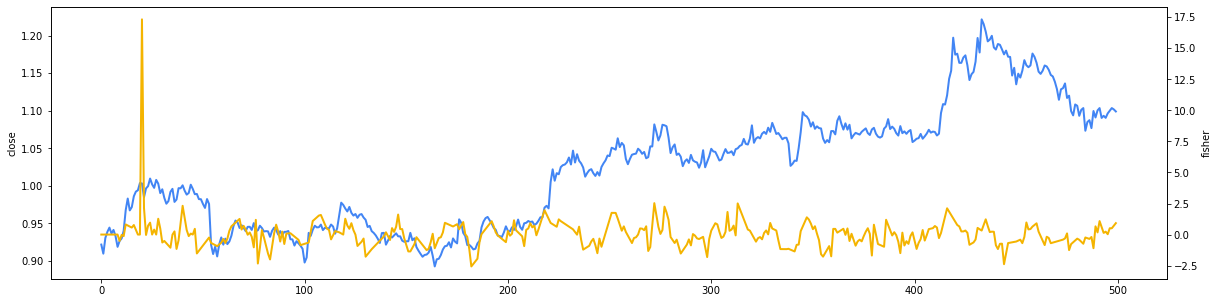

In [6]:
fisheranalysis("Binance_XRPUSDT_1h.csv")

## 1m

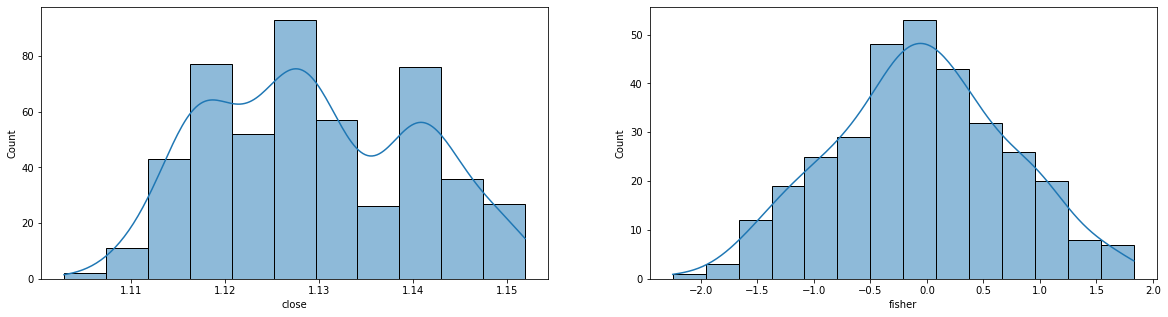

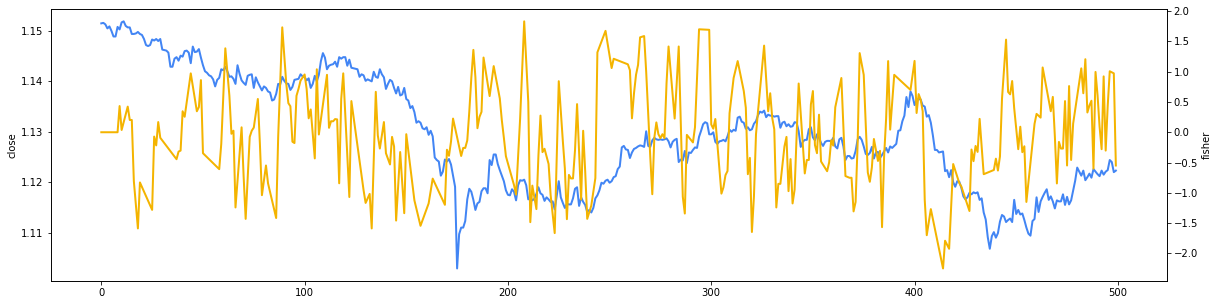

In [7]:
fisheranalysis("Binance_XRPUSDT_minute.csv")

Other timeframes other than 1m are not valid to use ! <br>
Causes:
 1. Jumps between timesteps are too big